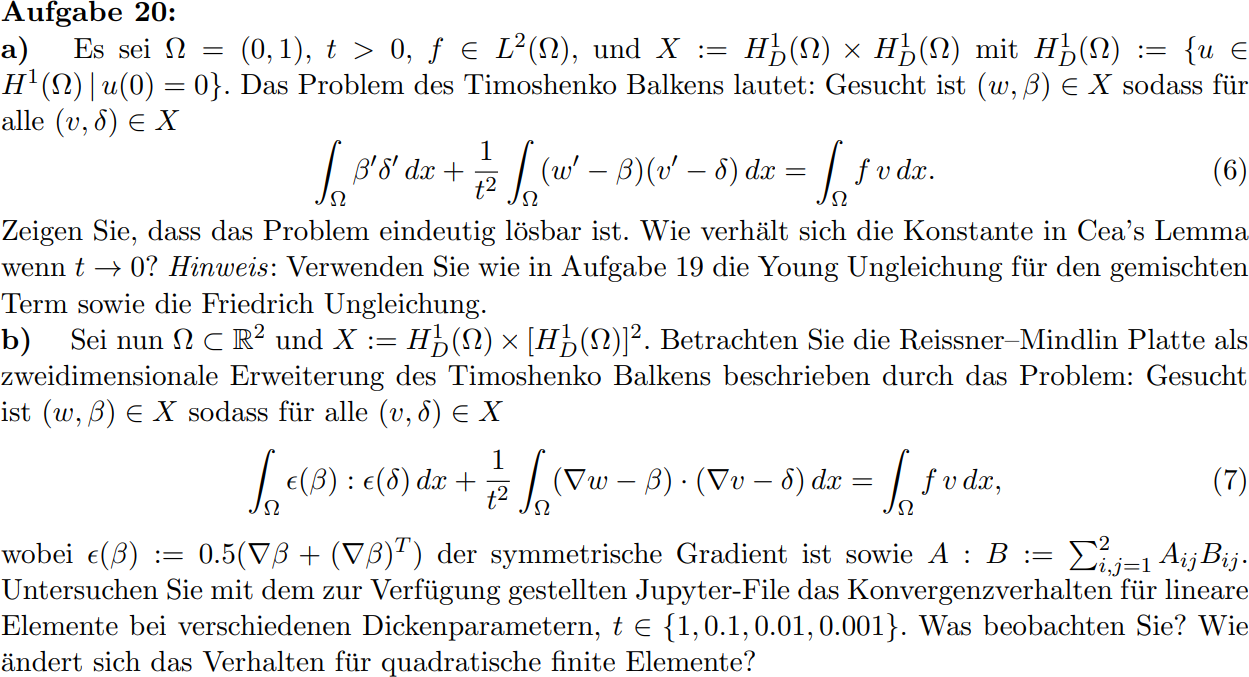

In [36]:
import ngsolve as ngs
from ngsolve.webgui import Draw
import numpy as np
import matplotlib.pyplot as plt
from netgen.geom2d import SplineGeometry

In [48]:
order = 1
h_array = np.array([1/2**i for i in range(2,6)])
# force
fz = 0.01
# thickness
t_array = np.array([1,0.1,0.01,0.001])
R = 5

r = ngs.sqrt(ngs.x**2+ngs.y**2)
xi = r/R

geo = SplineGeometry()
geo.AddCircle((0,0), R, bc="circ")

In [49]:
err_arrays = []

for t in t_array:
    w_ex = -3*fz*(R**4)/16*(1-xi**2)*( (1-xi**2) + 8*(t/R)**2/3)
    err_array = []
    
    for h in h_array:
        mesh = ngs.Mesh(geo.GenerateMesh(maxh=h))
        mesh.Curve(order)
        fesW = ngs.H1(mesh, order=order, dirichlet="circ")
        fesB = ngs.VectorH1(mesh, order=order, dirichlet="circ")
        fes = fesW*fesB
        (w,beta), (dw,dbeta) = fes.TnT()
        
        a = ngs.BilinearForm(fes, symmetric=True)
        a += 1/12*ngs.InnerProduct(ngs.Sym(ngs.grad(beta)),ngs.Sym(ngs.grad(dbeta)))*ngs.dx
        a += 1/(2*t**2)*ngs.InnerProduct( ngs.grad(w)-beta, ngs.grad(dw)-dbeta )*ngs.dx
        a.Assemble()

        f = ngs.LinearForm(fes)
        f += -fz*dw*ngs.dx
        f.Assemble()
        
        gfsol = ngs.GridFunction(fes)
        gfw, gfbeta= gfsol.components

        gfsol.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
        
        norm_w = ngs.sqrt(ngs.Integrate(w_ex*w_ex, mesh))
        l2err = ngs.sqrt(ngs.Integrate((gfw-w_ex)*(gfw-w_ex), mesh))/norm_w
        err_array.append(l2err)
        
    err_arrays.append(err_array)

<IPython.core.display.Javascript object>


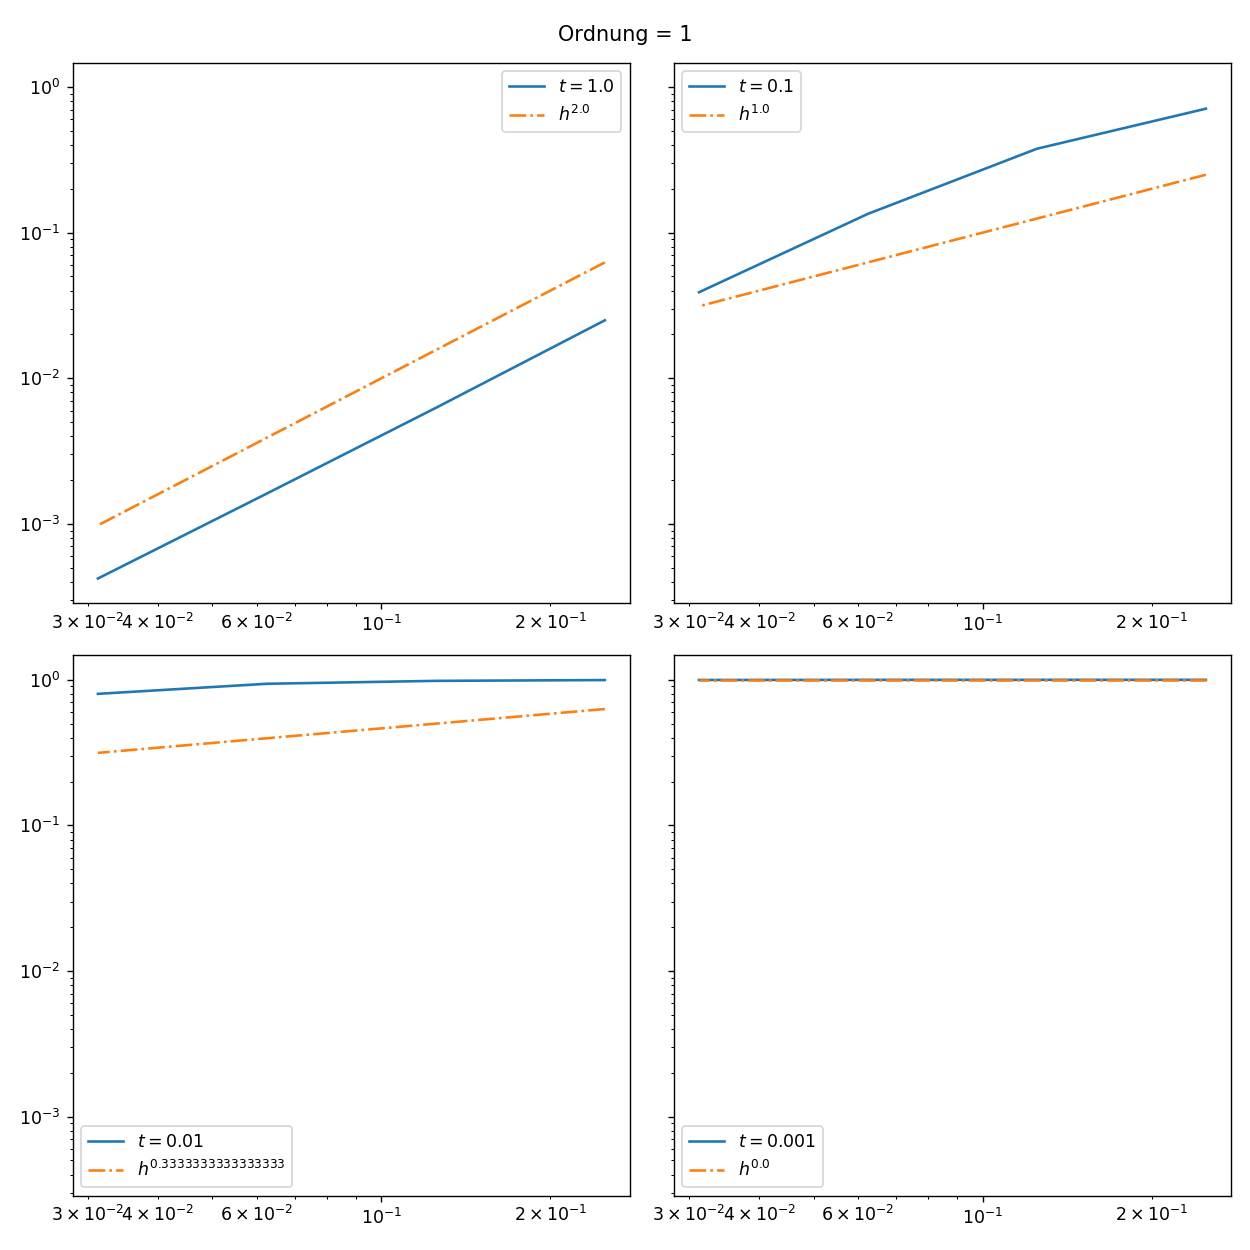

In [76]:
%matplotlib notebook

s_array = np.array([2,1,1/3,0])

fig, axes  = plt.subplots(2, 2, figsize = (10,10),sharey = True)

for t,s,err_array,i,j in zip(t_array,s_array,err_arrays,[0,0,1,1],[0,1,0,1]):
    axes[i][j].loglog(h_array,err_array, label =f"$t = {t}$")
    axes[i][j].loglog(h_array,h_array**s, label =f"$h^{{{s}}}$", linestyle = "-.")
    axes[i][j].legend()
    
fig.tight_layout()
fig.suptitle("Ordnung = 1")
fig.subplots_adjust(top = 0.95)
plt.show()

In [77]:
order = 2

In [78]:
err_arrays = []

for t in t_array:
    w_ex = -3*fz*(R**4)/16*(1-xi**2)*( (1-xi**2) + 8*(t/R)**2/3)
    err_array = []
    
    for h in h_array:
        mesh = ngs.Mesh(geo.GenerateMesh(maxh=h))
        mesh.Curve(order)
        fesW = ngs.H1(mesh, order=order, dirichlet="circ")
        fesB = ngs.VectorH1(mesh, order=order, dirichlet="circ")
        fes = fesW*fesB
        (w,beta), (dw,dbeta) = fes.TnT()
        
        a = ngs.BilinearForm(fes, symmetric=True)
        a += 1/12*ngs.InnerProduct(ngs.Sym(ngs.grad(beta)),ngs.Sym(ngs.grad(dbeta)))*ngs.dx
        a += 1/(2*t**2)*ngs.InnerProduct( ngs.grad(w)-beta, ngs.grad(dw)-dbeta )*ngs.dx
        a.Assemble()

        f = ngs.LinearForm(fes)
        f += -fz*dw*ngs.dx
        f.Assemble()
        
        gfsol = ngs.GridFunction(fes)
        gfw, gfbeta= gfsol.components

        gfsol.vec.data = a.mat.Inverse(fes.FreeDofs())*f.vec
        
        norm_w = ngs.sqrt(ngs.Integrate(w_ex*w_ex, mesh))
        l2err = ngs.sqrt(ngs.Integrate((gfw-w_ex)*(gfw-w_ex), mesh))/norm_w
        err_array.append(l2err)
        
    err_arrays.append(err_array)

<IPython.core.display.Javascript object>


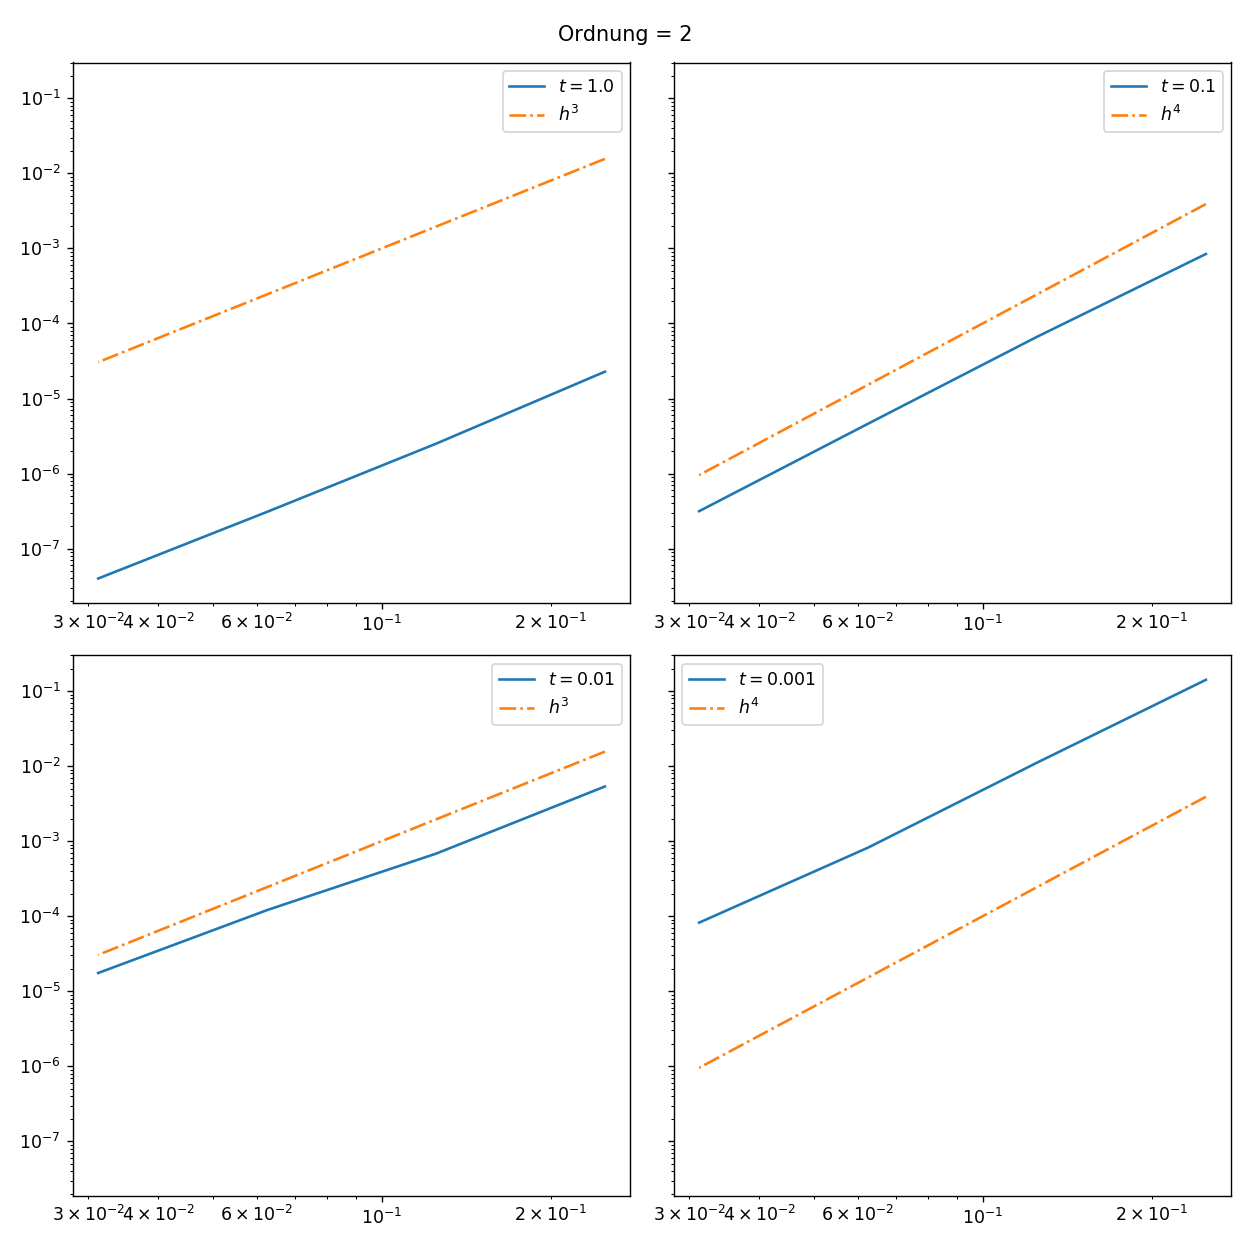

In [86]:
%matplotlib notebook

s_array = np.array([3,4,3,4])

fig, axes  = plt.subplots(2, 2, figsize = (10,10),sharey = True)

for t,s,err_array,i,j in zip(t_array,s_array,err_arrays,[0,0,1,1],[0,1,0,1]):
    axes[i][j].loglog(h_array,err_array, label =f"$t = {t}$")
    axes[i][j].loglog(h_array,h_array**s, label =f"$h^{{{s}}}$", linestyle = "-.")
    axes[i][j].legend()
    
fig.tight_layout()
fig.suptitle("Ordnung = 2")
fig.subplots_adjust(top = 0.95)
plt.show()